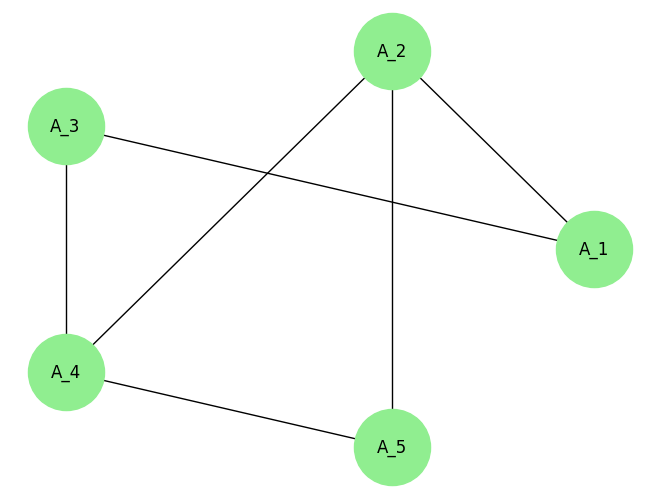

In [9]:
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import MarkovNetwork, MarkovModel
import networkx as nx
import numpy as np

edges = [
    ('A_1', 'A_2'),
    ('A_1', 'A_3'),
    ('A_2', 'A_4'),
    ('A_2', 'A_5'),
    ('A_3', 'A_4'),
    ('A_4', 'A_5')
]

G = MarkovNetwork(edges)
coords = nx.circular_layout(G)
nx.draw(G, pos=coords, with_labels=True, node_size=3000, node_color='lightgreen')

In [10]:
cliques = list(nx.find_cliques(G))
for clique in cliques:
    print(clique)

['A_2', 'A_5', 'A_4']
['A_2', 'A_1']
['A_3', 'A_4']
['A_3', 'A_1']


In [30]:
values = []
cardinalities = []
for clique in cliques:
    cardinality = [2] * len(clique)
    value = []
    cardinalities.append(cardinality)
    # clici de 2 sau 3 elemente
    if len(clique) == 2:
        i_1 = int(clique[0].split('_')[1])
        i_2 = int(clique[1].split('_')[1])
        for v_1 in range(2):
            for v_2 in range(2):
                value.append(np.exp(i_1 * v_1 + i_2 * v_2))
    elif len(clique) == 3:
        i_1 = int(clique[0].split('_')[1])
        i_2 = int(clique[1].split('_')[1])
        i_3 = int(clique[2].split('_')[1])
        for v_1 in range(2):
            for v_2 in range(2):
                for v_3 in range(2):
                    value.append(np.exp(i_1 * v_1 + i_2 * v_2 + i_3 * v_3))
    values.append(value)

In [32]:
for i, clique in enumerate(cliques):
    clique_factor = DiscreteFactor(clique,
                                   cardinality=cardinalities[i],
                                   values=values[i])
    G.add_factors(clique_factor)

In [21]:
G.get_factors()

[<DiscreteFactor representing phi(A_2:2, A_5:2, A_4:2) at 0x23d196ea750>,
 <DiscreteFactor representing phi(A_2:2, A_1:2) at 0x23d1ba89eb0>,
 <DiscreteFactor representing phi(A_3:2, A_4:2) at 0x23d1ba8a9c0>,
 <DiscreteFactor representing phi(A_3:2, A_1:2) at 0x23d1ba89fd0>]

In [22]:
G.check_model()

True

In [23]:
G.get_local_independencies()

(A_1 ⟂ A_5, A_4 | A_2, A_3)
(A_2 ⟂ A_3 | A_5, A_4, A_1)
(A_3 ⟂ A_5, A_2 | A_4, A_1)
(A_4 ⟂ A_1 | A_5, A_2, A_3)
(A_5 ⟂ A_3, A_1 | A_2, A_4)

In [33]:
from pgmpy.inference import BeliefPropagation
bp_infer = BeliefPropagation(G)
marginals = bp_infer.map_query(variables=['A_1', 'A_2', 'A_3', 'A_4', 'A_5'])
print(marginals)

{'A_1': 1, 'A_2': 1, 'A_3': 1, 'A_4': 1, 'A_5': 1}
